<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/experimental/Experimental_hmm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
#!pip install yfinance
#!pip install hmmlearn

In [124]:
import numpy as np
import pandas as pd
import datetime
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [125]:
from datetime import datetime
ticker = "^nsei"
start_date = '2010-01-02'

df = yf.download(ticker, start_date)


[*********************100%***********************]  1 of 1 completed


In [126]:
df.reset_index(inplace=True,drop=False)
df.drop(['Open','High','Low','Adj Close'],axis=1,inplace=True)
df['Date'] = df['Date'].apply(datetime.toordinal)
df = list(df.itertuples(index=False, name=None))

In [127]:
dates = np.array([q[0] for q in df], dtype=int)
end_val = np.array([q[1] for q in df])
volume = np.array([q[2] for q in df])[1:]

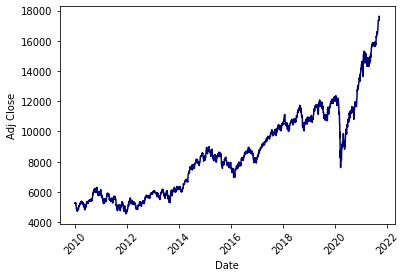

In [128]:
diff = np.diff(end_val)
dates = dates[1:]
end_val = end_val[1:]
X = np.column_stack([diff])
fig, ax = plt.subplots()
#plt.gca().xaxis.set_major_locator(YearLocator())
plt.plot_date(dates,end_val,"-",color="navy")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.show()

In [129]:
#model = hmm.GaussianHMM(n_components=2, covariance_type="diag")

model = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=1000)
model.fit(X)

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=2, n_iter=1000, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=False)

In [130]:
hidden_states = model.predict(X)
pd.DataFrame(hidden_states,columns=["hidden_state"])

,hidden_state
0,1
1,1
2,1
3,1
4,1
...,...
2862,1
2863,1
2864,1
2865,1


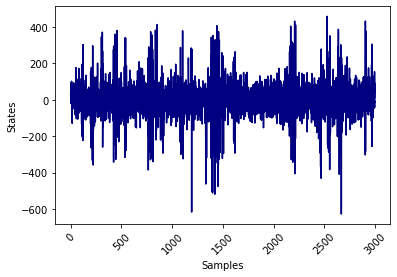

In [131]:
num_sample = 3000
sample, _ = model.sample(num_sample)
plt.plot(np.arange(num_sample), sample[:,0],color="navy")
plt.xlabel("Samples")
plt.ylabel("States")
plt.xticks(rotation=45)
plt.show()

In [132]:
for i in range(model.n_components):
    print("{0} order hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covars_[i]))
    print()

0 order hidden state
mean =  [1.27245732]
var =  [33659.48238136]

1 order hidden state
mean =  [4.88844716]
var =  [4201.05023885]



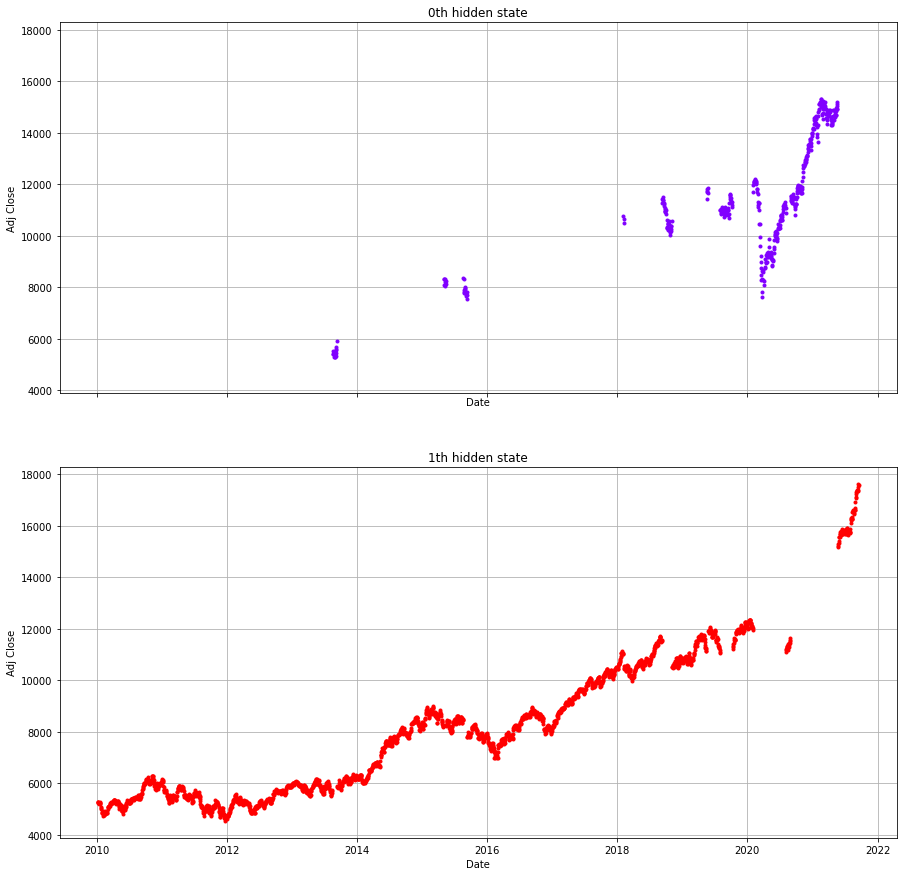

In [133]:
from matplotlib import cm
fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True, figsize=(15,15))
colours = cm.rainbow(np.linspace(0, 1, model.n_components))
for i, (ax, colour) in enumerate(zip(axs, colours)):
    mask = hidden_states == i
    ax.plot_date(dates[mask], end_val[mask], ".", c=colour)
    ax.set_title("{0}th hidden state".format(i))
    ax.set_xlabel("Date")
    ax.set_ylabel("Adj Close")
    #ax.xaxis.set_major_locator(YearLocator())
    #ax.xaxis.set_minor_locator(MonthLocator())
    ax.grid(True)
plt.show()

In [134]:
expected_returns_and_volumes = np.dot(model.transmat_, model.means_)
returns_and_volume_columnwise = list(zip(*expected_returns_and_volumes))
expected_returns = returns_and_volume_columnwise[0]
#expected_volumes = returns_and_volume_columnwise[1]
params = pd.concat([pd.Series(expected_returns)], axis=1)
params.columns= ['Returns']
pd.DataFrame(params)

,Returns
0,1.432823
1,4.857767
